In [ ]:
import sklearn
# Import all of the scikit learn stuff
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import warnings
# Suppress warnings from pandas library
warnings.filterwarnings("ignore", category=DeprecationWarning,
module="pandas", lineno=570)
import numpy as np

In [ ]:
pip install grammar-check==1.3.1

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement grammar-check==1.3.1 (from versions: none)
ERROR: No matching distribution found for grammar-check==1.3.1


In [ ]:
import grammar_check
tool = grammar_check.LanguageTool('en-GB')
text = 'Table of contents Introduction Spectrum is a finite and scarce but non-exhaustible natural resource which is a vital input for wireless servicesment of wireless technology has ensured that there is an increasing range of valuable uses of the spectrum With competing users, uses and growth of wireless services, the demand for spectrum has tremendously increased.Introduction The trend of modern communications is towards mobility, with increasingly higher data rates/ speeds, for which wireless is the only option  The requirements of captive applications are also growing. All these have resulted in greater demands/ pressure on the already scarce RF spectrum resource Introduction Shortage of spectrum will be setback to innovations, competition, businesses and consumers. Making spectrum available at a time when convergence is causing rapid and unpredictable change poses a severe challenge.Advances in technology create the potential for systems to use spectrum more efficiently and to be much more tolerant of interference than in the past.Introduction With the availability of higher data speeds, the user requirements are also continually increasing wrt: different services and applications, expecting a dynamic, continuing stream of new capabilities that are ubiquitous and available across a range of devices using a single subscription and a single identity.Requirement for new radio access technologies to satisfy the anticipated demands for higher bandwidth services is increasing. IMT and IMT-Advanced technologies are the answers to these requirements IMT and IMT-Advanced Technologies LTE, LTE Advanced and Wireless MAN-Advanced, are designed to enable high speed Internet/Broadband at anytime, anywhere. These systems facilitate higher bandwidth, higher data rate and support higher level of user-level customization.As per ITU for IMT-Advanced technologies, the targeted peak data rates are up to 100 Mbit/s for high mobility and up to 1 Gbit/s for low mobility scenario. Scalable bandwidths up to at least 40 MHz should be provided IMT-Advanced Technologies-Key Features High degree of commonality of functionality worldwide while retaining the flexibility to support a wide range of services and applications in a cost efficient manner compatibility of services within IMT and with fixed networks; capability of interworking with other radio access systems; high quality mobile services; User equipment suitable for worldwide use; User-friendly applications, services and equipment;Worldwide roaming capa'
matches = tool.check(text)
len(matches)

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving text15.csv to text15.csv


In [ ]:
import pandas as pd
df=pd.read_csv("text15.csv")
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
df['text']=df['text']. str.replace('[^\w\s]', ' ')
df['text']=df['text']. str.replace('\n', ' ')
df['text'] = df['text'].str.replace('[0-9]',' ')
stop_words_l=stopwords.words('english')
df['text']=df.text.apply(lambda x: " ".join(re.sub(r'[^a-zA-Z]',' ',w).lower() for w in x.split() if re.sub(r'[^a-zA-Z]',' ',w).lower() not in stop_words_l) )
df['text'] = df['text'].str.replace('don t', '')
x=df.text.values.tolist()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


In [ ]:
import pandas as pd
df=pd.read_csv("text15.csv")
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
df['text']=df['text']. str.replace('[^\w\s]', ' ')
df['text']=df['text']. str.replace('\n', ' ')
df['text'] = df['text'].str.replace('[0-9]',' ')
stop_words_l=stopwords.words('english')
df['text']=df.text.apply(lambda x: " ".join(re.sub(r'[^a-zA-Z]',' ',w).lower() for w in x.split() if re.sub(r'[^a-zA-Z]',' ',w).lower() not in stop_words_l) )


x=df.text.values.tolist()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


In [ ]:
import numpy
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english')
dtm = vectorizer.fit_transform(x)
dtm = dtm.asfptype()   #######in the vector space
#pd.DataFrame(dtm.toarray(),index=x,columns=vectorizer.get_feature_names())
#pd.DataFrame(dtm.toarray())
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(n_components=16, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
#print(lsa.singular_values_)
# Compute document similarity using LSA components: TF-IDF
#similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
similarity= cosine_similarity(dtm_lsa)
#similarity= cosine_similarity(dtm_lsa)
#differences=euclidean_distances(dtm_lsa)
#pd.DataFrame(similarity,index=x, columns=x)#
#pd.DataFrame(similarity)
similarity[:, 0:3]
#differences[:,0:3]
#####Similarity score using tf-idf word embeddingin the semantic space #########

array([[1.00000000e+00, 6.25946506e-01, 7.41780749e-01],
       [6.25946506e-01, 1.00000000e+00, 5.83552585e-01],
       [7.41780749e-01, 5.83552585e-01, 1.00000000e+00],
       [2.16799143e-01, 9.08587667e-02, 5.60980510e-01],
       [3.92562701e-01, 3.93544866e-01, 8.10281052e-01],
       [2.27505231e-01, 1.97911917e-01, 2.99501578e-01],
       [9.37386188e-02, 1.91991819e-01, 4.41555176e-01],
       [6.93867587e-01, 9.61455843e-01, 6.55368421e-01],
       [3.71443510e-01, 5.70131383e-01, 6.12924121e-01],
       [1.73047129e-01, 1.44990465e-01, 1.35558979e-01],
       [2.29255233e-01, 3.56027312e-01, 5.94268008e-01],
       [7.11199006e-02, 1.12601287e-01, 1.08121077e-01],
       [6.76127059e-01, 8.60843051e-01, 7.43539051e-01],
       [2.37329889e-01, 3.01806739e-01, 3.62692756e-01],
       [2.58645263e-01, 3.50105334e-01, 3.98117890e-01],
       [1.03055355e-01, 4.89556593e-02, 1.49215906e-01],
       [3.09744732e-01, 4.40633708e-01, 5.56821103e-01],
       [3.27530033e-01, 1.39545

In [ ]:
#example = ["Automated grading is an emerging technology helpful to teachers and students. It reduces the paper load of teachers and assessment-related issues. Some teachers can give overall grades based on one good impression in particular aspects or slight inclination towards their favorite students. It may lead to inconsistencies and inaccuracies in the assessment. Grading of students' work provides feedback to them for enhancing work quality. Hence, there is a need for an automated grading system [1, 2]. Project and Seminar presentations are essential academic activities in the curriculum of Indian universities in undergraduate studies. Design and delivery of a presentation are soft skills that will help students increase employability skills in their professional lives. Presentation skill covers technical and non-technical aspects like a scholar's knowledge and presentation quality. The presentation should be graded based on the presentation quality and the accuracy and authenticity of the contents covered in the presentation. Our main objective is to evaluate the presentation quality of the PowerPoint presentations. The teachers use rubrics designed by their institute or department or sometimes use their expertise and experience to grade instead of using rubrics.",
#           "Automated grading is an emerging technology helpful to teachers and students. It reduces the paper load of teachers and assessment-related issues. Some teachers can give overall grades based on one good impression in particular aspects or slight inclination towards their favorite students. It may lead to inconsistencies and inaccuracies in the assessment. Grading of students' work provides feedback to them for enhancing work quality. Hence, there is a need for an automated grading system [1, 2]. Project and Seminar presentations are essential academic activities in the curriculum of Indian universities in undergraduate studies. Design and delivery of a presentation are soft skills that will help students increase employability skills in their professional lives. Presentation skill covers technical and non-technical aspects like a scholar's knowledge and presentation quality. The presentation should be graded based on the presentation quality and the accuracy and authenticity of the contents covered in the presentation. Our main objective is to evaluate the presentation quality of the PowerPoint presentations. The teachers use rubrics designed by their institute or department or sometimes use their expertise and experience to grade instead of using rubrics."]
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(x)
dtm = dtm.asfptype()
#pd.DataFrame(dtm.toarray(),index=x,columns=vectorizer.get_feature_names()).head(10)
#pd.DataFrame(dtm.toarray())
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(n_components=16, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
# Compute document similarity using LSA components
#similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
similarity= cosine_similarity(dtm_lsa)
#similarity= cosine_similarity(dtm_lsa)

#differences=euclidean_distances(tfidf_vectors)
#pd.DataFrame(similarity,index=x, columns=x)
#pd.DataFrame(similarity)
similarity[:, 0:3]
#differences[:,0:3]
#####Similarity score using count vector  word embeddingin the semantic space #########

array([[1.        , 0.65839265, 0.74468044],
       [0.65839265, 1.        , 0.56187637],
       [0.74468044, 0.56187637, 1.        ],
       [0.3120819 , 0.40134702, 0.56806832],
       [0.53632812, 0.56333555, 0.76253201],
       [0.40391835, 0.41683469, 0.43829331],
       [0.20590369, 0.2760868 , 0.34704286],
       [0.71081173, 0.97939741, 0.57797195],
       [0.47800636, 0.6560114 , 0.66414495],
       [0.46550177, 0.50204563, 0.54251369],
       [0.49741062, 0.38311814, 0.61545659],
       [0.15411722, 0.18952331, 0.17636015],
       [0.75876468, 0.87566847, 0.84240454],
       [0.50381114, 0.7704143 , 0.67283976],
       [0.46012371, 0.75513065, 0.63847754],
       [0.2298293 , 0.13178071, 0.19697281],
       [0.63282823, 0.70211194, 0.76263318],
       [0.37441685, 0.19566617, 0.3583756 ],
       [0.19149314, 0.10210356, 0.18239001],
       [0.32172329, 0.22171255, 0.32911978],
       [0.40440712, 0.14762475, 0.38198933],
       [0.95926146, 0.62014489, 0.69281108],
       [0.

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
nltk.download('punkt')
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i, doc in enumerate(df.text)]
#training documents need to be in the form TaggedDocument, which basically means each document receives a unique id, provided by the variable offset
#model_d2v = Doc2Vec(vector_size=100,alpha=0.025, min_count=1)//consider word which occurs ateat 1
model_d2v = Doc2Vec(alpha=0.025, min_count=1)

model_d2v.build_vocab(tagged_data)
#build_vocab() step is how the model discovers the set of all possible words/doc-tags – and in the case of words, finds which words occur more than min_count times.
for epoch in range(100):
    model_d2v.train(tagged_data,
                total_examples=model_d2v.corpus_count,
                epochs=model_d2v.epochs)
#The value of epochs determines how many times the training corpus will be used during training. The vector_size determines how large the resulting document vectors will be. Furthermore, any word occurring less frequently than min_count will be discarded. Without going into too much detail, the window is used during training to determine how many words to include as a given word’s context while inspecting it

document_embeddings=np.zeros((df.shape[0],100))

for i in range(len(document_embeddings)):
    document_embeddings[i]=model_d2v.docvecs[i]

similarity=cosine_similarity(document_embeddings) #cosine similarity

similarity[:, 0:3]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


array([[1.        , 0.66390873, 0.47745415],
       [0.66390873, 1.        , 0.44360078],
       [0.47745415, 0.44360078, 1.        ],
       [0.54848983, 0.49897466, 0.50080099],
       [0.45306474, 0.44605244, 0.52192293],
       [0.51030369, 0.46811628, 0.40047096],
       [0.49594757, 0.55649205, 0.52700502],
       [0.51827906, 0.63975507, 0.38910925],
       [0.4125704 , 0.48100693, 0.50341171],
       [0.56568029, 0.45478974, 0.43393916],
       [0.46590837, 0.54689573, 0.36735893],
       [0.43335366, 0.51832499, 0.47028805],
       [0.4420881 , 0.51822035, 0.48375432],
       [0.49320056, 0.52590105, 0.56019815],
       [0.49225003, 0.53619558, 0.56425408],
       [0.52183133, 0.59287579, 0.54344688],
       [0.4803422 , 0.58571959, 0.50335134],
       [0.45509917, 0.47309003, 0.49463603],
       [0.47167459, 0.54552488, 0.46122105],
       [0.45784178, 0.48992367, 0.4327763 ],
       [0.50795546, 0.47821953, 0.45469852],
       [0.76263057, 0.61716348, 0.42205683],
       [0.

In [ ]:
pip install -U sentence-transformers

     |████████████████████████████████| 79 kB 5.1 MB/s 
     |████████████████████████████████| 3.5 MB 34.8 MB/s 
     |████████████████████████████████| 1.2 MB 51.2 MB/s 
     |████████████████████████████████| 67 kB 4.7 MB/s 
     |████████████████████████████████| 895 kB 55.9 MB/s 
     |████████████████████████████████| 596 kB 67.6 MB/s 
     |████████████████████████████████| 6.8 MB 53.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=66da3e537cc4df6cf5e6474139fac39324b2db13b0961c41bc7c3d0d4b93da27
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# New Section

In [ ]:
import pickle
from sentence_transformers import SentenceTransformer
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')  #  'multi-qa-MiniLM-L6-cos-v1'
# save the model to disk
filename = 'bert_model.sav'
pickle.dump(bert_model, open(filename, 'wb'))

# some time later...
import pickle
y=df.text.values.tolist()
filename = 'bert_model.sav'
# load the model from disk
model = pickle.load(open(filename, 'rb'))
sen_embeddings = model.encode(y)  #
sen_embeddings.shape
from sklearn.metrics.pairwise import cosine_similarity
#let's calculate cosine similarity for sentence 0:
cosine_similarity(
    [sen_embeddings[0]],
    sen_embeddings[1:]
)

 # cosine_similarity(sen_embeddings)

similarity=cosine_similarity(sen_embeddings)
similarity[:, 0:3]
#####Similarity score using BERT word embeddingin  #########


Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

array([[0.9999999 , 0.7881616 , 0.8411282 ],
       [0.7881616 , 1.0000001 , 0.8717271 ],
       [0.8411282 , 0.8717271 , 1.        ],
       [0.7044405 , 0.7783368 , 0.72843874],
       [0.72894704, 0.8201375 , 0.83886486],
       [0.8709353 , 0.86224174, 0.88801223],
       [0.75960225, 0.7743257 , 0.7960428 ],
       [0.82865155, 0.8736166 , 0.92036057],
       [0.6610795 , 0.8612278 , 0.7868079 ],
       [0.7430167 , 0.87194204, 0.8621662 ],
       [0.7133152 , 0.83888865, 0.8205257 ],
       [0.6260387 , 0.70669544, 0.67884374],
       [0.82936   , 0.9058696 , 0.90776783],
       [0.7589772 , 0.82707447, 0.811995  ],
       [0.7554394 , 0.82982284, 0.8116228 ],
       [0.6467109 , 0.7616244 , 0.7749939 ],
       [0.7548562 , 0.81850743, 0.86661136],
       [0.6433188 , 0.7494583 , 0.780323  ],
       [0.7110673 , 0.7086764 , 0.7062017 ],
       [0.673632  , 0.7420457 , 0.767447  ],
       [0.6094113 , 0.6976492 , 0.77891463],
       [0.81274194, 0.84081036, 0.903463  ],
       [0.

In [ ]:
sen_embeddings.shape

(26, 768)

In [ ]:
#############################used upto here for thesis ###########################################################
###################################################################################################################

In [ ]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer=Tokenizer()
tokenizer.fit_on_texts(df.text)
tokenized_documents=tokenizer.texts_to_sequences(df.text)
tokenized_paded_documents=pad_sequences(tokenized_documents,maxlen=150,padding='post')
vocab_size=len(tokenizer.word_index)+1
print (tokenized_paded_documents[1])
vocab_size

[328 235  29  10  90 485 236 185 184 326 478  24 104 184  50 147  50 147
 148  11  45 486  43 102  11  47  11 113 487  50 186  21 119 105 237  63
 488   7 123 324 770  46  50 147 325   5 183  90 485 236 185 184  90 235
 489 771 483   1 177  46  44  45   2   1  44  45  21   7   9 490 491   9
  77  89 772 773 149  44  12 774 149 300  12  77  89  51  73   5 492   4
 775 238 776   9 777 179 149  44  45 493 236 106 122  44  45   4 778 779
  45 780  45 317 149 781 177  46  44  45  73   2   1 406 407  73 166 408
 211 212   2   1 205 409 287 494  35  10  60 288   6  32 166 213 134   1
  10 211   2   1  25  10]


1328

In [ ]:
# loading pre-trained embeddings, each word is represented as a 300 dimensional vector
import gensim
W2V_PATH="https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
model_w2v = gensim.models.KeyedVectors.load_word2vec_format(W2V_PATH, binary=True)

import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model_w2v, open(filename, 'wb'))

# some time later...

# load the model from disk
import pickle
filename = 'finalized_model.sav'
model = pickle.load(open(filename, 'rb'))
import numpy as np

In [ ]:
embedding_matrix=np.zeros((vocab_size,300))
for word,i in tokenizer.word_index.items():
    if word in model:
        embedding_matrix[i]=model[word]
# creating document-word embeddings
document_word_embeddings=np.zeros((len(tokenized_paded_documents),150,300)) # embedding size, in each doc 150 words of vector size=300
for i in range(len(tokenized_paded_documents)):#17
    for j in range(len(tokenized_paded_documents[0])):#150
        document_word_embeddings[i][j]=embedding_matrix[tokenized_paded_documents[i][j]]
document_word_embeddings.shape
#document_word_embeddings[0]

In [ ]:
# calculating average of word vectors of a document weighted by tf-idf
document_embeddings=np.zeros((len(tokenized_paded_documents),300))
document_embeddings[0]
tfidf_vectors
feature_names = tfidfvectoriser.get_feature_names()
corpus_index = [17 for n in x]
import pandas as pd
df = pd.DataFrame(tfidf_vectors.T.todense(), index=feature_names, columns=corpus_index)
print(df)

In [ ]:
for i in range(len(document_word_embeddings)):
    document_embeddings[i]=0
    for j in range(len(words)):
        a=embedding_matrix[tokenizer.word_index[words[j]]]
        b=df.values[j][i]

        print(b)

In [ ]:
document_embeddings=np.zeros((len(tokenized_paded_documents),300))
words=tfidfvectoriser.get_feature_names()
def mul(a,b):
     for k in range(300):
        return(b*(a[k]))

In [ ]:
document_embeddings=np.zeros((len(tokenized_paded_documents),300))
words=tfidfvectoriser.get_feature_names()
def mul(a,b):
     for k in range(300):
        return(b*(a[k]))


for i in range(len(document_word_embeddings)):
    document_embeddings[i]=0
    for j in range(len(words)):
        a=embedding_matrix[tokenizer.word_index[words[j]]]
        b=df.values[j][i]
        print(a)
        print(b)
        document_embeddings[i]+= mul(a,b)
print(document_embeddings.shape)
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

In [ ]:
print(lsa.singular_values_)


[2.13091808 1.22579651 1.07851243 1.04902199 0.99991004 0.99550134
 0.98445034 0.9163936  0.88428704 0.87788937 0.81943236 0.79779159
 0.77214166 0.75591843 0.63566901]


In [ ]:
#tf_idf_vec = TfidfVectorizer(use_idf=True,
 #                       smooth_idf=False,
  #                      ngram_range=(1,1),stop_words='english') # to use only  bigrams ngram_range=(2,2)
#transform
#tf_idf_data = tf_idf_vec.fit_transform([sentence_1,sentence_2])


In [ ]:
######################################################plot used in thesis ######################################################
################################################################################################################################

In [ ]:
# Fit LSA. Use algorithm = “randomized” for large datasets
import numpy
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english')
dtm = vectorizer.fit_transform(x)
dtm = dtm.asfptype()   #####vector space
lsa = TruncatedSVD(n_components=3, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(dtm)   #####semantic space
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)


In [ ]:
#pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns =vectorizer.get_feature_names())

In [ ]:
#pd.DataFrame(dtm_lsa, index = x, columns = ["component_1","component_2"])
#pd.DataFrame(dtm_lsa)

In [ ]:
xs = [w[0] for w in dtm_lsa]  #first dimension/components
ys = [w[1] for w in dtm_lsa] #second dimension
zs= [w[2] for w in dtm_lsa]
#xs=np.array(xs)
#ys=np.array(ys)


Populating the interactive namespace from numpy and matplotlib


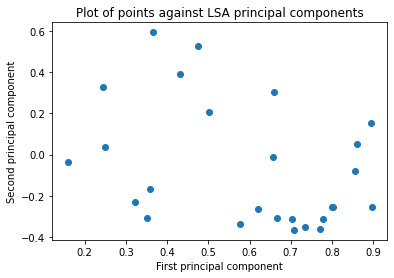

In [ ]:
#Plot scatter plot of points
%pylab inline
import matplotlib.pyplot as plt
figure()
plt.scatter(xs,ys)
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')
show()


Populating the interactive namespace from numpy and matplotlib


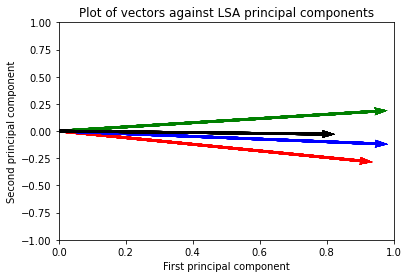

<Figure size 216x144 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot scatter plot of points with vectors
%pylab inline
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
x_pos = [0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_pos = [0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
ax.quiver(x_pos,y_pos,xs[0],ys[0],angles='xy',scale_units='xy',scale=1, linewidth = .01, color='red')
ax.quiver(x_pos,y_pos,xs[1],ys[1],angles='xy',scale_units='xy',scale=1, linewidth = .01, color='green')
ax.quiver(x_pos,y_pos,xs[2],ys[2],angles='xy',scale_units='xy',scale=1, linewidth = .01, color='blue')
ax.quiver(x_pos,y_pos,xs[4],ys[4],angles='xy',scale_units='xy',scale=1, linewidth = .01)
#ax.quiver(x_pos,y_pos,xs[15],ys[15],angles='xy',scale_units='xy',scale=1, linewidth = .01, color='grey')
ax.set_xlim([0,1])
ax.set_ylim([-1,1])
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of vectors against LSA principal components')
plt.figure(figsize=(3, 2))
plt.draw()
plt.show()


In [ ]:
plt.savefig('vector.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
files. download('vector.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
##########################################################used upto here ############################################################
#####################################################################################################################################

In [ ]:
# Compute document similarity using LSA components: TF-IDF, components=3
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
#pd.DataFrame(similarity,index=x, columns=x)
#pd.DataFrame(similarity)
#similarity[:, 1:4]

In [ ]:
# Compute document similarity using LSA components: Counter vectorizer, components=4
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
#pd.DataFrame(similarity,index=x, columns=x)
#pd.DataFrame(similarity)
#similarity[:, 1:4]

NameError: ignored

In [ ]:
# Compute document similarity using LSA components: Counter vectorizer, components=3
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
#pd.DataFrame(similarity,index=x, columns=x)
pd.DataFrame(similarity)
similarity[:, 1:4]

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
tfidfvectoriser=TfidfVectorizer()
tfidfvectoriser.fit(df.text)
tfidf_vectors=tfidfvectoriser.transform(df.text)
pairwise_similarities=np.dot(tfidf_vectors,tfidf_vectors.T).toarray()
pairwise_differences=euclidean_distances(tfidf_vectors)
def most_similar(doc_id,similarity_matrix,matrix):
   # print (f'Document: {df.iloc[doc_id]["text"]}')
    #print ('\n')
    #print ('Similar Documents:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
      #  print (f'Document: {df.iloc[ix]["text"]}')
       # print (f'{matrix} : {similarity_matrix[doc_id][ix]}')


most_similar(0,pairwise_similarities,'Cosine Similarity')
most_similar(0,pairwise_differences,'Euclidean Distance')



In [ ]:

pairwise_similarities=cosine_similarity(document_embeddings) #cosine similarity
pairwise_differences=euclidean_distances(document_embeddings)


def most_similar(doc_id,similarity_matrix,matrix):
    print (f'Document: {df.iloc[doc_id]["text"]}')
    print ('\n')
    print ('Similar Documents:')
    #sorting
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        print (f'Document: {df.iloc[ix]["text"]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')




most_similar(0,pairwise_similarities,'Cosine Similarity')
most_similar(0,pairwise_differences,'Euclidean Distance')

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
nltk.download('punkt')


tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i, doc in enumerate(df.text)]
#training documents need to be in the form TaggedDocument, which basically means each document receives a unique id, provided by the variable offset
model_d2v = Doc2Vec(vector_size=100,alpha=0.025, min_count=1)

model_d2v.build_vocab(tagged_data)
#build_vocab() step is how the model discovers the set of all possible words/doc-tags – and in the case of words, finds which words occur more than min_count times.
for epoch in range(100):
    model_d2v.train(tagged_data,
                total_examples=model_d2v.corpus_count,
                epochs=model_d2v.epochs)
#The value of epochs determines how many times the training corpus will be used during training. The vector_size determines how large the resulting document vectors will be. Furthermore, any word occurring less frequently than min_count will be discarded. Without going into too much detail, the window is used during training to determine how many words to include as a given word’s context while inspecting it

document_embeddings=np.zeros((df.shape[0],100))

for i in range(len(document_embeddings)):
    document_embeddings[i]=model_d2v.docvecs[i]


pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)


def most_similar(doc_id,similarity_matrix,matrix):
    print (f'Document: {df.iloc[doc_id]["text"]}')
    print ('\n')
    print ('Similar Documents:')
    #sorting
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        print (f'Document: {df.iloc[ix]["text"]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')




most_similar(0,pairwise_similarities,'Cosine Similarity')
most_similar(0,pairwise_differences,'Euclidean Distance')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Document: operating system operating system program acts intermediary user computer computer hardware operating system goals execute user programs make solving user problems easier make computer system convenient use use computer hardware efficient manner four components computer system operating systems depends point view users want convenience ease use good performance care resource utilization shared computer mainframe minicomputer must keep users happy users dedicate systems workstations dedicated resources frequently use shared resources servers handheld computers resource poor optimized usability battery life computers little user interface embedded computers devices automobiles operating system definition os resource allocator manages resources decides conflicting requests efficient fair resource use os control program controls execution programs prevent errors improper

In [ ]:
pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 3.5 MB/s 
     |████████████████████████████████| 3.5 MB 11.1 MB/s 
     |████████████████████████████████| 6.8 MB 49.9 MB/s 
     |████████████████████████████████| 1.2 MB 64.7 MB/s 
     |████████████████████████████████| 67 kB 5.4 MB/s 
     |████████████████████████████████| 596 kB 67.1 MB/s 
     |████████████████████████████████| 895 kB 68.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=120999 sha256=0a562030bbde684a233616ff1fd11fbfc79bdbf86437d888fe181ebea7fcc6a3
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pickle
from sentence_transformers import SentenceTransformer
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')
# save the model to disk
filename = 'bert_model.sav'
pickle.dump(bert_model, open(filename, 'wb'))

# some time later...
import pickle
y=df.text.values.tolist()
filename = 'bert_model.sav'
# load the model from disk
model = pickle.load(open(filename, 'rb'))
sen_embeddings = model.encode(y)
sen_embeddings.shape
from sklearn.metrics.pairwise import cosine_similarity
#let's calculate cosine similarity for sentence 0:
cosine_similarity(
    [sen_embeddings[0]],
    sen_embeddings[1:]
)

 # cosine_similarity(sen_embeddings)

pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)


def most_similar(doc_id,similarity_matrix,matrix):
    print (f'Document: {df.iloc[doc_id]["text"]}')
    print ('\n')
    print ('Similar Documents:')
    #sorting
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        print (f'Document: {df.iloc[ix]["text"]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')




most_similar(0,pairwise_similarities,'Cosine Similarity')
most_similar(0,pairwise_differences,'Euclidean Distance')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

array([[0.78816175, 0.84112823, 0.70444053, 0.728947  , 0.8709353 ,
        0.7596023 , 0.8286518 , 0.6610795 , 0.7430168 , 0.71331525,
        0.7253603 , 0.82936007, 0.7469057 , 0.7554394 , 0.6488403 ,
        0.6286628 ]], dtype=float32)

In [ ]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer=Tokenizer()
tokenizer.fit_on_texts(df.text)
tokenized_documents=tokenizer.texts_to_sequences(df.text)
tokenized_paded_documents=pad_sequences(tokenized_documents,maxlen=150,padding='post')
vocab_size=len(tokenizer.word_index)+1
print (tokenized_paded_documents[1])
vocab_size

[ 284  198   33   12  146  285  364  286  196  361  489   11   66  196
   65  230   65  230  129   15   37  661   44  145   15   61   15  156
  492   65  170   29  164  130  365   56  662    6  195  487 1050   59
   65  230  488    5  281  146  285  364  286  196  146  198  663 1051
  283    1  275   59   39   37    2    1   39   37   29    6    8  366
  367    8   84  128  664  665  131   39   16  666  131  344   16   84
  128   55  107    5  287    9 1052  368  667    8 1053  193  131   39
   37  668  364  148  102   39   37    9 1054  288   37  493   37  225
  131 1055  275   59   39   37  107    2    1  604  605  107  265  606
  332  213    2    1  324  607  443  669   41   12   94  333    4   28
  265  266  158    1   12  332    2    1   24   12]


1999

In [ ]:
# loading pre-trained embeddings, each word is represented as a 300 dimensional vector
import gensim
W2V_PATH="https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
model_w2v = gensim.models.KeyedVectors.load_word2vec_format(W2V_PATH, binary=True)

import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model_w2v, open(filename, 'wb'))

# some time later...



In [ ]:
import gc

# get the current collection
# thresholds as a tuple
print("Garbage collection thresholds:",
                    gc.get_threshold())

Garbage collection thresholds: (700, 10, 10)


In [ ]:
# Importing gc module
import gc

# Returns the number of
# objects it has collected
# and deallocated
collected = gc.collect()

# Prints Garbage collector
# as 0 object
print("Garbage collector: collected",
          "%d objects." % collected)

Garbage collector: collected 217 objects.


In [ ]:
# load the model from disk
import pickle
filename = 'finalized_model.sav'
model = pickle.load(open(filename, 'rb'))
import numpy as np

In [ ]:
# creating embedding matrix, every row is a vector representation from the vocabulary indexed by the tokenizer index.
embedding_matrix=np.zeros((vocab_size,300))
for word,i in tokenizer.word_index.items():
    if word in model:
        embedding_matrix[i]=model[word]
# creating document-word embeddings
document_word_embeddings=np.zeros((len(tokenized_paded_documents),150,300)) # embedding size, in each doc 150 words of vector size=300
for i in range(len(tokenized_paded_documents)):#17
    for j in range(len(tokenized_paded_documents[0])):#150
        document_word_embeddings[i][j]=embedding_matrix[tokenized_paded_documents[i][j]]
document_word_embeddings.shape
document_word_embeddings[0]

NameError: ignored

In [ ]:
# calculating average of word vectors of a document weighted by tf-idf
document_embeddings=np.zeros((len(tokenized_paded_documents),300))
document_embeddings[0]
tfidf_vectors
feature_names = tfidfvectoriser.get_feature_names()
corpus_index = [17 for n in x]
import pandas as pd
df = pd.DataFrame(tfidf_vectors.T.todense(), index=feature_names, columns=corpus_index)
print(df)


In [ ]:
for i in range(len(document_word_embeddings)):
    document_embeddings[i]=0
    for j in range(len(words)):
        a=embedding_matrix[tokenizer.word_index[words[j]]]
        b=df.values[j][i]

        print(b)

In [ ]:
for i in range(len(document_word_embeddings)):
    document_embeddings[i]=0
    for j in range(len(words)):
        a=embedding_matrix[tokenizer.word_index[words[j]]]
        b=df.values[j][i]

        print(b)

In [ ]:
for i in range(len(document_word_embeddings)):
    document_embeddings[i]=0
    for j in range(len(words)):
        a=embedding_matrix[tokenizer.word_index[words[j]]]
        b=df.values[j][i]

        print(b)

In [ ]:
tfidf_vectors
feature_names = tfidfvectoriser.get_feature_names()
corpus_index = [17 for n in x]
import pandas as pd
df = pd.DataFrame(tfidf_vectors.T.todense(), index=feature_names, columns=corpus_index)
print(df)

In [ ]:
document_embeddings=np.zeros((len(tokenized_paded_documents),300))
words=tfidfvectoriser.get_feature_names()
def mul(a,b):
     for k in range(300):
        return(b*(a[k]))

In [ ]:
for i in range(len(document_word_embeddings)):
    document_embeddings[i]=0
    for j in range(len(words)):
        a=embedding_matrix[tokenizer.word_index[words[j]]]
        b=df.values[j][i]

        print(b)

In [ ]:
document_embeddings=np.zeros((len(tokenized_paded_documents),300))
words=tfidfvectoriser.get_feature_names()
def mul(a,b):
     for k in range(300):
        return(b*(a[k]))


for i in range(len(document_word_embeddings)):
    document_embeddings[i]=0
    for j in range(len(words)):
        a=embedding_matrix[tokenizer.word_index[words[j]]]
        b=df.values[j][i]
        print(a)
        print(b)
        document_embeddings[i]+= mul(a,b)
print(document_embeddings.shape)
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)


def most_similar(doc_id,similarity_matrix,matrix):
   # print (f'Document: {df.iloc[doc_id]["text"]}')
    print ('\n')
    print ('Similar Documents:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        #print (f'Document: {df.iloc[ix]["text"]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')






most_similar(0,pairwise_similarities,'Cosine Similarity')
most_similar(0,pairwise_differences,'Euclidean Distance')












In [ ]:
tfidf_vectors
feature_names = tfidfvectoriser.get_feature_names()
corpus_index = [3 for n in x]
import pandas as pd
df = pd.DataFrame(tfidf_vectors.T.todense(), index=feature_names, columns=corpus_index)

#df_stacked = df.stack()
df.to_numpy()

df.values[9][2]
#embedding_matrix[tokenizer.word_index[words[5]]]